In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('dataset/train.csv')

In [5]:
df.shape

(404290, 6)

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
59212,59212,103752,103753,Which is better Ubuntu or Windows 8.1?,Which is a better OS between Ubuntu & Windows 8?,0
322671,322671,50496,448525,How many degrees does the hour hand of a clock...,How many degrees does the hour hand of a clock...,1
323972,323972,450005,450006,How do we teach kindness?,How do I teach?,0
140952,140952,223892,223893,Is the recent PBS quiz 'Are You Sexist?' in it...,Are France's anti-veil laws sexist?,0
329270,329270,171256,331120,Nobody is answering my questions on Quora and ...,Even though most of my asked questions are in ...,1
156878,156878,148299,122986,How do I get started to create a new website?,What is the easiest way to create a website?,1
182596,182596,279423,279424,Who can be a Dalai Lama?,Who is the Dalai Lama?,0
402328,402328,535796,535797,Will ActionCable perform well in Ruby on Rails...,How fast is Rails 5 ActionCable compared to No...,0
380571,380571,210737,512192,Which course to choose?,Which course should I choose?,0
363853,363853,102341,153999,How do I know if somebody likes me?,How would I know if she likes me?,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

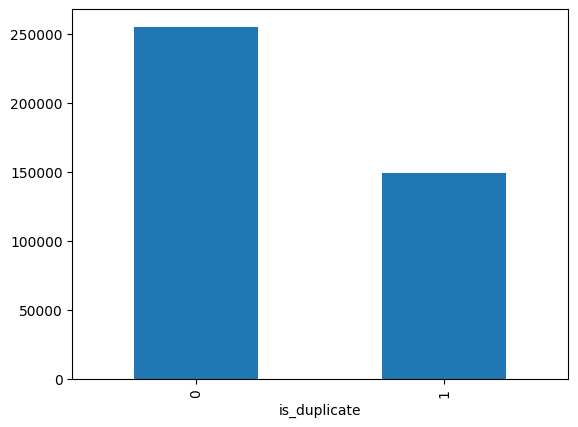

In [10]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:

# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


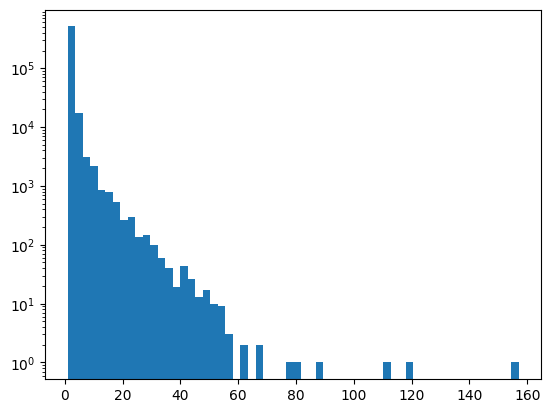

In [12]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=60)
plt.yscale('log')
plt.show()